In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
print(os.listdir(r"C:\Users\giang\Desktop\Deep\catdog\catdog"))

['data', 'test1', 'train']


In [2]:
train_dir = r"C:\Users\giang\Desktop\Deep\catdog\catdog\train"
test_dir = r"C:\Users\giang\Desktop\Deep\catdog\catdog\test1"

In [3]:
img_names = os.listdir(os.path.join(train_dir))
img_names[:10]

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.10000.jpg',
 'cat.10001.jpg',
 'cat.10002.jpg',
 'cat.10003.jpg',
 'cat.10004.jpg']

In [4]:
label = []

for i in img_names:
    if(i.split(".")[0] == "dog"):
        label.append("Dog")
    else:
        label.append("Cat")

label[:10]

['Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat', 'Cat']

In [5]:
df = pd.DataFrame({"Image" : img_names, "Label" : label})
df.head()

Image Label
0     cat.0.jpg   Cat
1     cat.1.jpg   Cat
2    cat.10.jpg   Cat
3   cat.100.jpg   Cat
4  cat.1000.jpg   Cat

In [6]:
train_df, validate_df = train_test_split(df, test_size = 0.2)
train_df = train_df.reset_index(drop = True)
validate_df = validate_df.reset_index(drop = True)

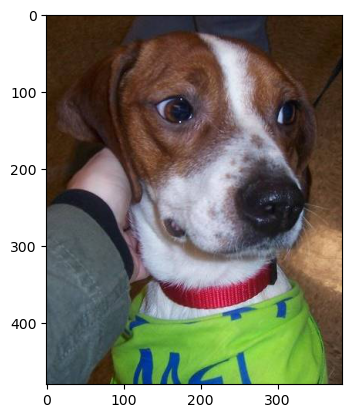

In [7]:
sample = random.choice(img_names)
image = load_img("C:\\Users\\giang\\Desktop\\Deep\\catdog\\catdog\\train\\"+sample)
plt.imshow(image)

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras import layers, models, regularizers

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation= 'relu', input_shape=(150, 150, 3)),
    tf.keras.layers. MaxPooling2D (2, 2),
    tf.keras.layers.Dropout(0,3),
    tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
    tf.keras.layers. MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0,3),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers. MaxPooling2D(2,2),

    tf.keras.layers. Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0,5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0,5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,165,249 (73.11 MB)

 Trainable params: 19,165,249 (73.11 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)

In [11]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [12]:
callbacks = [earlystop, learning_rate_reduction]

In [13]:
FAST_RUN = False
batch_size = 20

In [14]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    train_dir, 
    x_col='Image',
    y_col='Label',
    target_size = (150, 150),
    class_mode = 'binary',
    batch_size = batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


In [15]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    train_dir, 
    x_col='Image',
    y_col='Label',
    target_size = (150, 150),
    class_mode = 'binary',
    batch_size = batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


In [16]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [17]:
epochs=3 if FAST_RUN else 30
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=150,
    steps_per_epoch=150,
    callbacks=callbacks,
    verbose = 2
)

Epoch 1/30


c:\Users\giang\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


150/150 - 73s - 490ms/step - acc: 0.5067 - loss: 0.7105 - val_acc: 0.5313 - val_loss: 0.6894 - learning_rate: 0.0010
Epoch 2/30
150/150 - 61s - 406ms/step - acc: 0.5530 - loss: 0.6904 - val_acc: 0.6375 - val_loss: 0.6598 - learning_rate: 0.0010
Epoch 3/30


c:\Users\giang\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


150/150 - 61s - 409ms/step - acc: 0.6197 - loss: 0.6593 - val_acc: 0.6507 - val_loss: 0.6258 - learning_rate: 0.0010
Epoch 4/30
150/150 - 56s - 375ms/step - acc: 0.6270 - loss: 0.6545 - val_acc: 0.6745 - val_loss: 0.6086 - learning_rate: 0.0010
Epoch 5/30
150/150 - 58s - 388ms/step - acc: 0.6530 - loss: 0.6300 - val_acc: 0.6930 - val_loss: 0.5742 - learning_rate: 0.0010
Epoch 6/30
150/150 - 52s - 346ms/step - acc: 0.6300 - loss: 0.6315 - val_acc: 0.6715 - val_loss: 0.6036 - learning_rate: 0.0010
Epoch 7/30

Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
150/150 - 42s - 278ms/step - acc: 0.6505 - loss: 0.6378 - val_acc: 0.6190 - val_loss: 0.6586 - learning_rate: 0.0010
Epoch 8/30
150/150 - 61s - 407ms/step - acc: 0.6790 - loss: 0.5966 - val_acc: 0.6965 - val_loss: 0.5792 - learning_rate: 5.0000e-04
Epoch 9/30
150/150 - 68s - 450ms/step - acc: 0.6887 - loss: 0.5850 - val_acc: 0.7247 - val_loss: 0.5343 - learning_rate: 5.0000e-04
Epoch 10/30
150/150 - 63s - 42

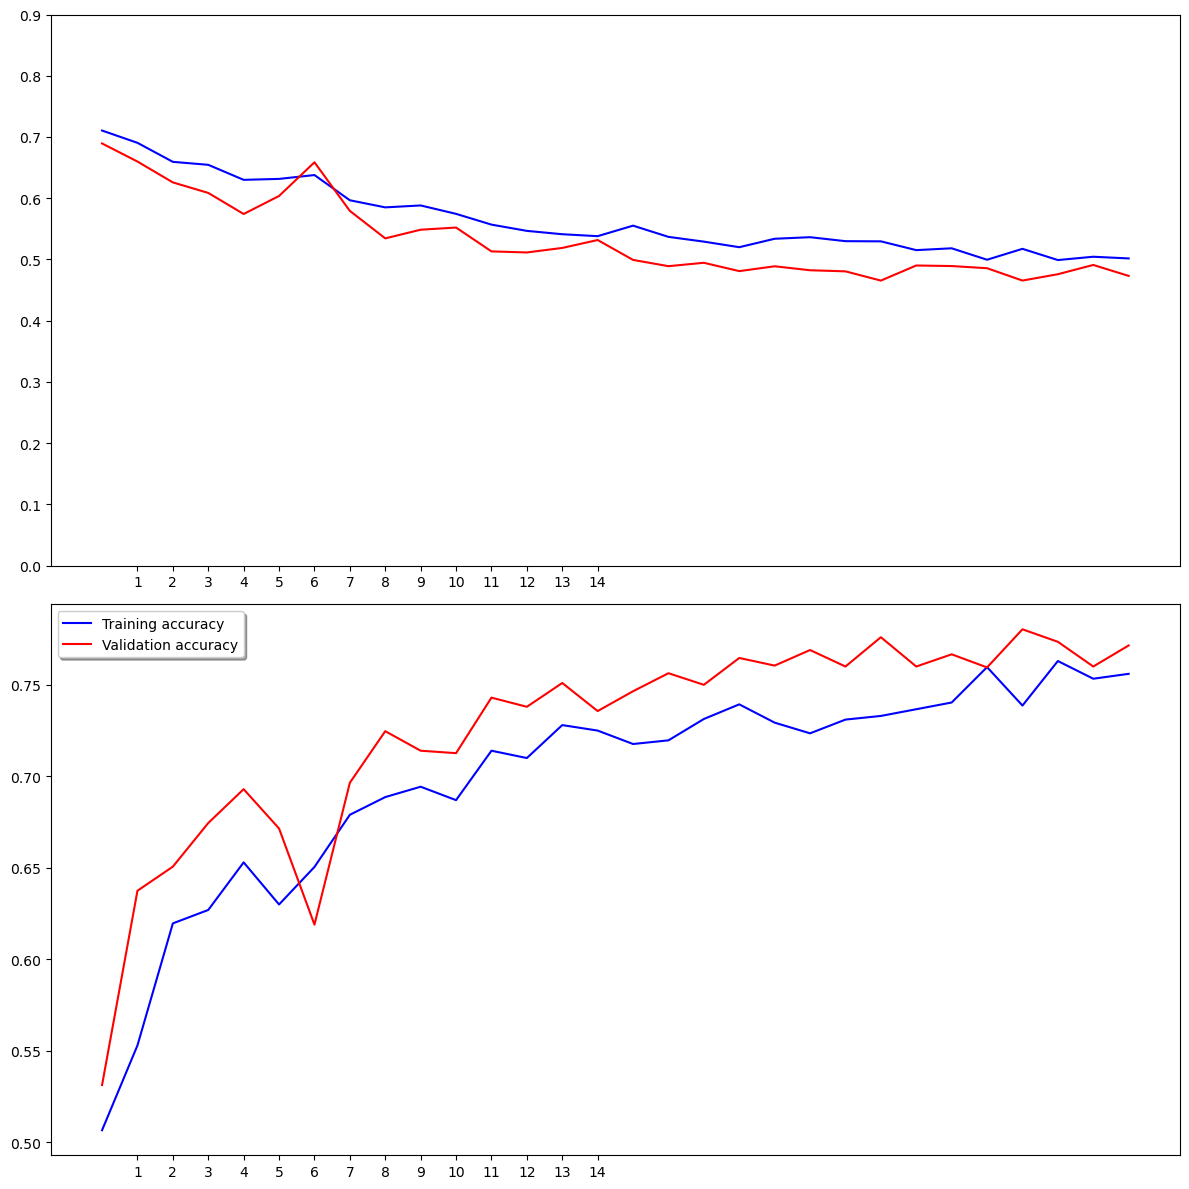

In [18]:
epochs = 15
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [22]:
test_img = os.listdir(os.path.join(test_dir))
test_img[:10]
test_df = pd.DataFrame({'Image': test_img})

In [23]:
test_df

Image
0          1.jpg
1         10.jpg
2        100.jpg
3       1000.jpg
4      10000.jpg
...          ...
12495   9995.jpg
12496   9996.jpg
12497   9997.jpg
12498   9998.jpg
12499   9999.jpg

[12500 rows x 1 columns]

In [24]:
test_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_gen.flow_from_dataframe(
    test_df, 
    test_dir, 
    x_col = 'Image',
    y_col = None,
    class_mode = None,
    target_size = (150, 150),
    batch_size = 32,
    shuffle = False
)

Found 12500 validated image filenames.


In [25]:
steps = int(np.ceil(12500/32))
predict = model.predict(test_generator, steps=steps)

c:\Users\giang\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 57s 145ms/step


In [26]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['Label'] = train_df['Label'].replace(label_map)

In [27]:
def label(predict):
    if(predict > 0.5):
        return "Dog"
    else:
        return "Cat"

In [28]:
test_df['Label'] = predict
test_df['Label'] = test_df['Label'].apply(label)

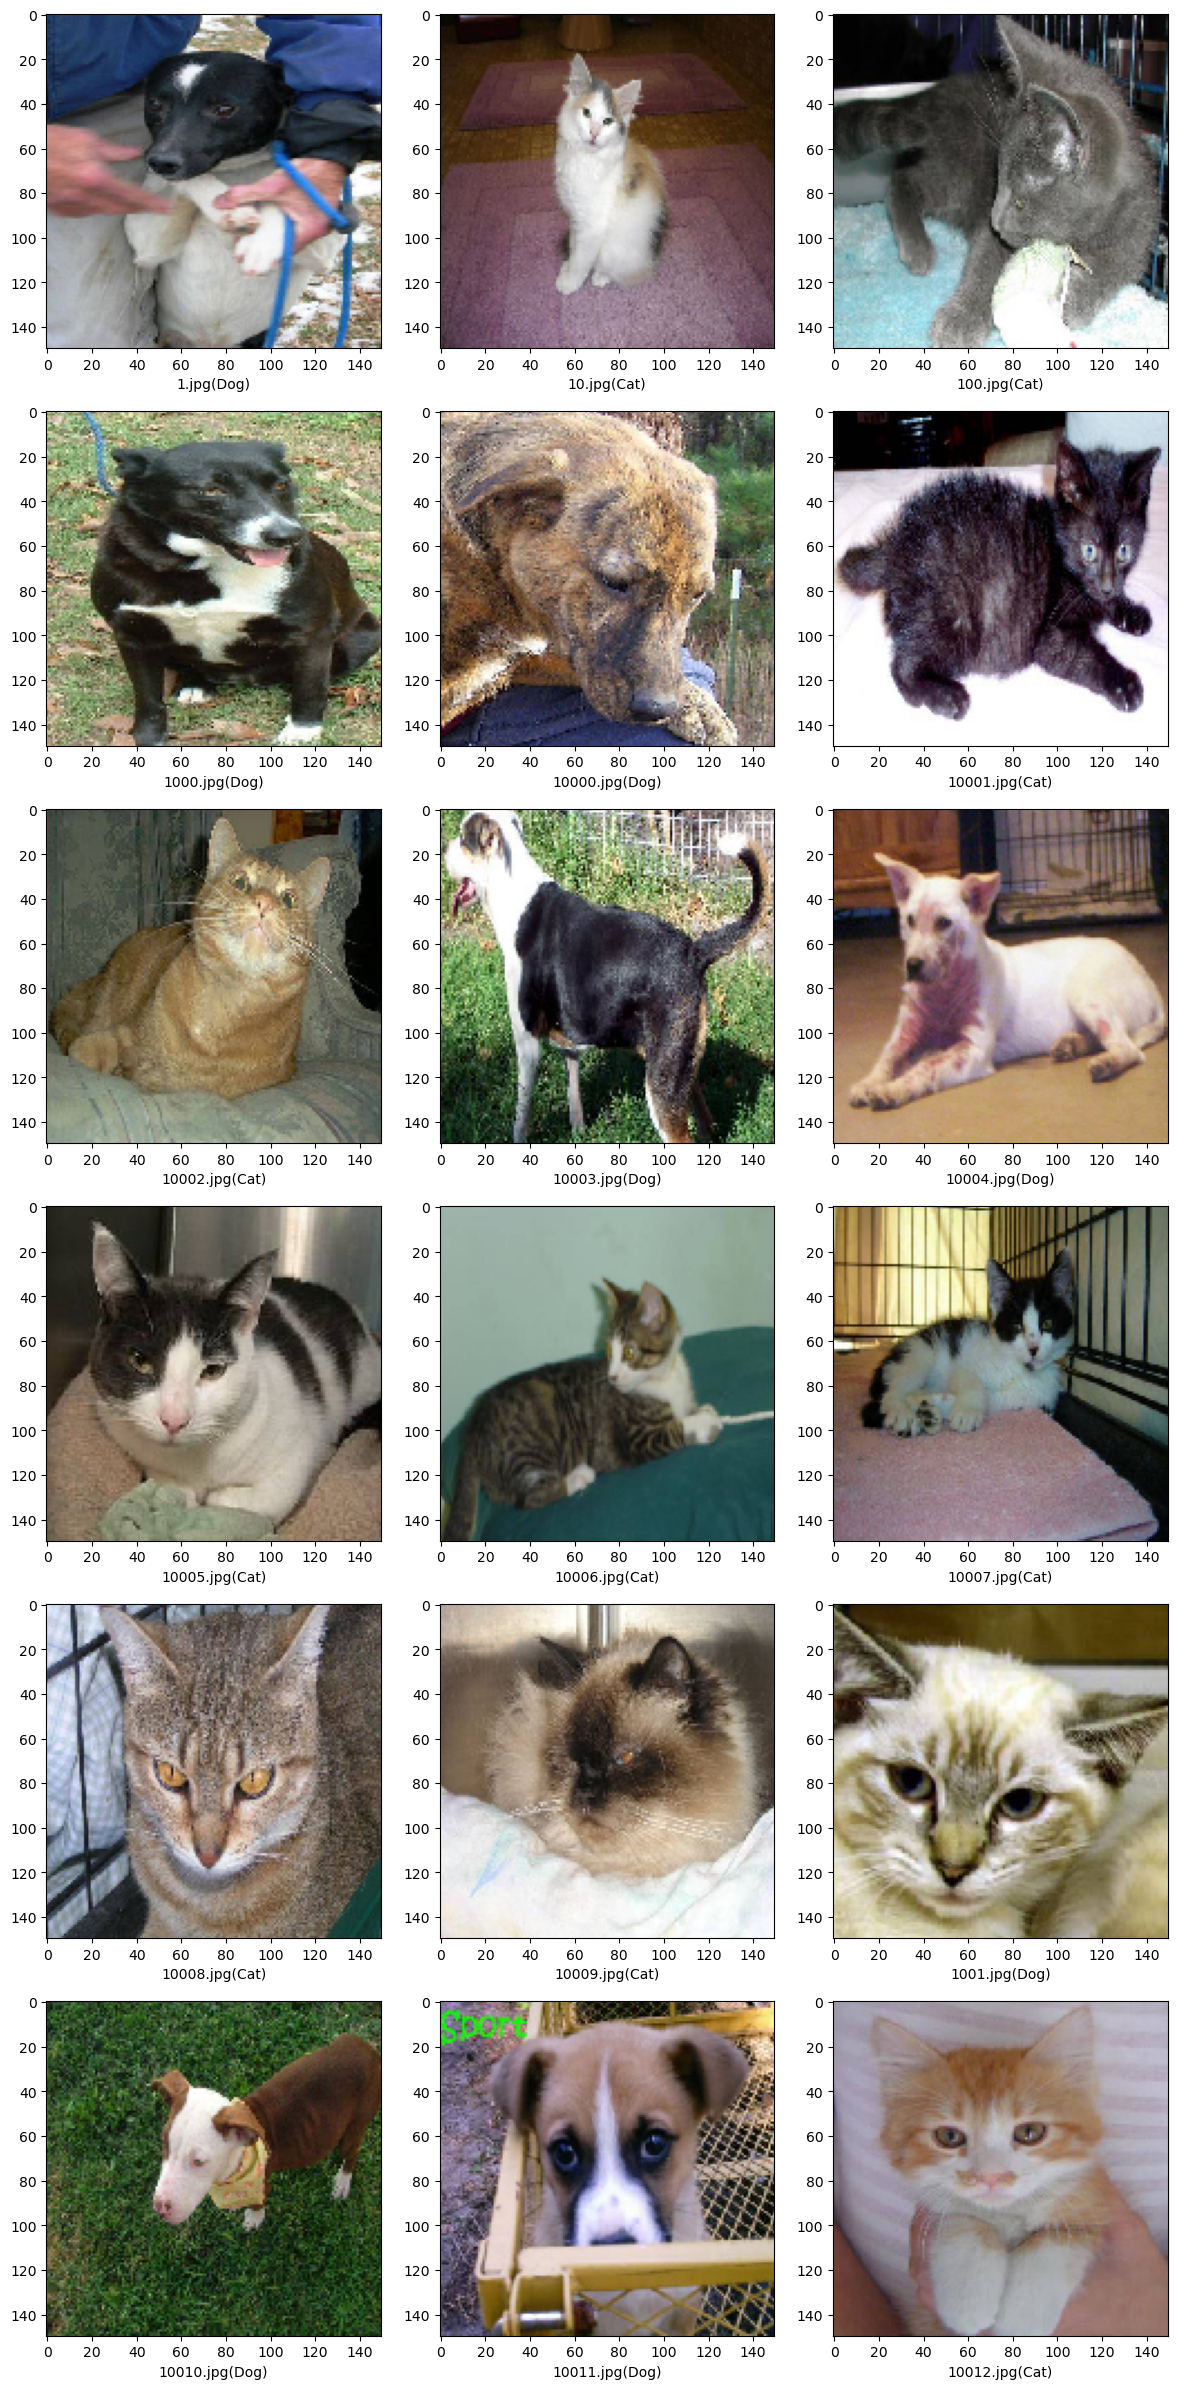

In [29]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['Image']
    category = row['Label']
    img = load_img("C:\\Users\\giang\\Desktop\\Deep\\catdog\\catdog\\test1\\"+filename, target_size=(150,150))
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()